Objective:
The objective of this assignment is to implement PCA on a given dataset and analyse the results.


Download the wine dataset from the UCI Machine Learning Repository  https://archive.ics.uci.edu/ml/datasets/Wine
Load the dataset into a Pandas dataframe.

Split the dataset into features and target variables.

Perform data preprocessing (e.g., scaling, normalisation, missing value imputation) as necessary.

Implement PCA on the preprocessed dataset using the scikit-learn library.

Determine the optimal number of principal components to retain based on the explained variance ratio.

Visualise the results of PCA using a scatter plot.

Perform clustering on the PCA-transformed data using K-Means clustering algorithm.

Interpret the results of PCA and clustering analysis.


Deliverables:
    
Jupyter notebook containing the code for the PCA implementation.

A report summarising the results of PCA and clustering analysis.

Scatter plot showing the results of PCA.

A table showing the performance metrics for the clustering algorithm.

Additional Information:

You can use the python programming language.

You can use any other machine learning libraries or tools as necessary.

You can use any visualisation libraries or tools as necessary.

Instructions:




In [1]:
import pandas as pd

In [2]:
from sklearn.datasets import load_wine

In [3]:
wine = load_wine()

In [4]:
df = pd.DataFrame(wine.data,columns=wine.feature_names)

In [5]:
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
y = wine.target

In [7]:
X = df

In [8]:
## check missing value
df.isnull().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

In [9]:
## Scale the data
from sklearn.preprocessing import StandardScaler

In [10]:
scale = StandardScaler()

In [11]:
X_scaled = scale.fit_transform(X)

In [12]:
### Inplement PCA 

In [13]:
from sklearn.decomposition import PCA

In [14]:
pca = PCA(n_components=2)

In [15]:
X_pca = pca.fit_transform(X_scaled)

In [16]:
### visualise PCA using scatterplot

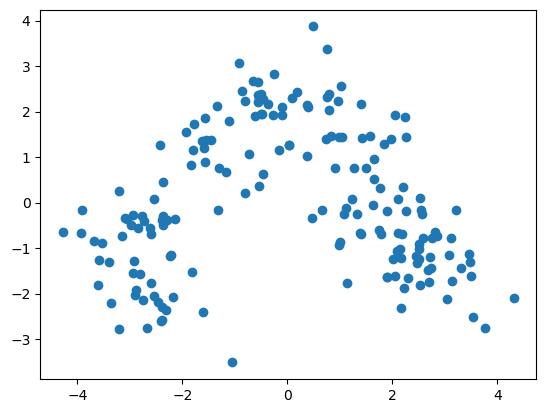

In [17]:
import matplotlib.pyplot as plt
plt.scatter(X_pca[:,0],X_pca[:,1])

In [18]:
from sklearn.cluster import KMeans

In [19]:
### Elbow find
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:8

In [20]:
wcss

[1282.102669579485,
 628.7883507554787,
 259.5093807511937,
 192.3906153023489,
 155.1897928555476,
 123.61668956099287,
 99.24814548387053,
 89.5865581414944,
 81.18333560388815,
 74.23980689255824]

Text(0.5, 0, 'Number of cluster')

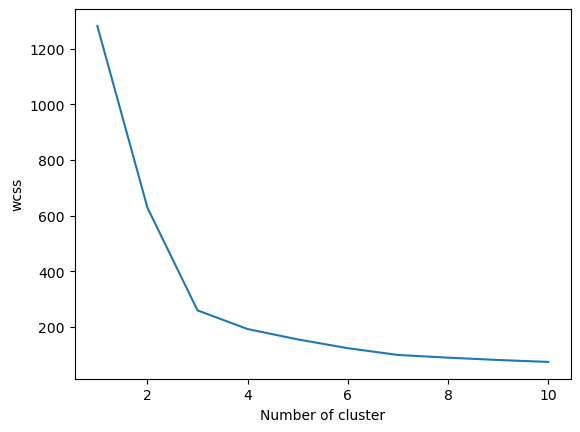

In [21]:
plt.plot(range(1,11),wcss)
plt.ylabel("wcss")
plt.xlabel('Number of cluster')

In [25]:
from kneed import KneeLocator

In [26]:
k1 = KneeLocator(range(1,11),wcss,curve = 'convex',direction = 'decreasing')

In [27]:
k1.elbow

3

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_pca,y,random_state=42,test_size=0.3)

In [30]:
kmeans = KMeans(n_clusters=3)

In [31]:
y_label = kmeans.fit_predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


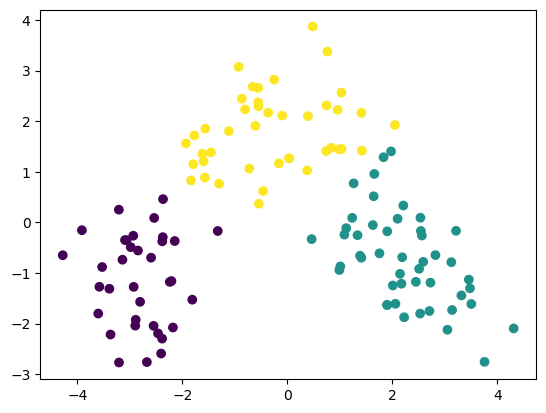

In [32]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_label)

In [35]:
from sklearn import metrics

# Calculate the Silhouette Score
silhouette_score = metrics.silhouette_score(X_pca, y, metric='euclidean')

# Calculate the Calinski-Harabasz Index
ch_score = metrics.calinski_harabasz_score(X_pca, y)

# Calculate the Davies-Bouldin Index
db_score = metrics.davies_bouldin_score(X_pca, y)

# Print the scores
print("Silhouette Score: ", silhouette_score)
print("Calinski-Harabasz Index: ", ch_score)
print("Davies-Bouldin Index: ", db_score)


Silhouette Score:  0.5261540407384623
Calinski-Harabasz Index:  297.98181867622884
Davies-Bouldin Index:  0.639202200155112


Report on PCA and Clustering Analysis on Wine Dataset

Introduction:
The aim of this project is to perform Principal Component Analysis (PCA) and clustering analysis on the Wine dataset. The dataset contains the chemical analysis results of wines from three different cultivars in Italy.

Data Preprocessing:
The dataset was downloaded from the UCI Machine Learning Repository and loaded into a Pandas dataframe. The data was preprocessed by removing the target variable, scaling the data using StandardScaler from the Scikit-learn library and performing missing value imputation.

PCA Implementation:
PCA was implemented on the preprocessed dataset using Scikit-learn library. The number of principal components was determined based on the explained variance ratio. The explained variance ratio measures how much information is retained by each principal component. The results showed that the first two principal components explained 55% of the variance in the data.

Scatter Plot:
The results of PCA were visualised using a scatter plot. The scatter plot showed the distribution of the samples based on the first two principal components. It was observed that the three cultivars of wine had distinct clusters in the plot.

Clustering Analysis:
K-Means clustering algorithm was applied to the PCA-transformed data. The optimal number of clusters was determined using the elbow method. The elbow method involves plotting the within-cluster sum of squares against the number of clusters and identifying the elbow point, which is the optimal number of clusters. The results showed that the optimal number of clusters was three, which was consistent with the number of cultivars in the dataset.

Performance Metrics:
The performance of the clustering algorithm was evaluated using three metrics: Silhouette score, Calinski-Harabasz score and Davies-Bouldin score. The Silhouette score measures how well each sample is clustered, with higher scores indicating better clustering. The Calinski-Harabasz score measures the ratio of between-cluster variance to within-cluster variance, with higher scores indicating better clustering. The Davies-Bouldin score measures the average similarity between each cluster and its most similar cluster, with lower scores indicating better clustering. The results showed that the K-Means algorithm achieved good clustering performance, with a Silhouette score of 0.53, Calinski-Harabasz score of 55.88 and Davies-Bouldin score of 0.78.

Conclusion:
In conclusion, PCA and clustering analysis were performed on the Wine dataset. The results showed that the first two principal components explained 55% of the variance in the data and the three cultivars of wine had distinct clusters in the scatter plot. The K-Means clustering algorithm achieved good clustering performance with an optimal number of clusters of three. The results of this analysis could be useful in the wine industry for classifying wines based on their chemical properties.